# A3a: Signals and Noise
Finn Hittson - fxh157  
CSDS 464  
Due: February 27th, 2023

In [1]:
import A3a_fxh157 as a3a
import math
import matplotlib.pyplot as plt
import numpy as np
import scipy
import IPython

import sys
sys.path.append('../464-A1b_fxh157_files/')
import A1b_fxh157 as a1b

## 1. Continuous signals and sampling

### 1a. Sampled functions

Example 1: Plot of a $1000Hz$ sinewave sampled at $8000Hz$.

a3a.plot_sampled_function(g=a1b.sinewave, fs=8000, tlim=(0, 6), tscale=0.001, tunits="msec", title="Sinewave", f=1000)

Example 2: Plot of a $10Hz$ gabor function sampled at $100Hz$.

a3a.plot_sampled_function(g=a1b.gabore, fs=100, tlim=(-0.3,0.3), tscale=1, tunits="sec", title="Gabor function", f=10, sigma=0.1)

Example 3: Plot of a $200Hz$ gammatone sampled at $1000Hz$.

a3a.plot_sampled_function(g=a1b.gammatone, fs=1000, tlim=(0,50/1000), tscale=1, tunits="msec", title="Gammatone", f=200)

### 1b. The Nyquist frequency and aliasing

Example 4: Plot of a $315Hz$ sinewave sampled at $1000Hz$. The sinewave below the Nyquist frequency shows samples per period that are unevenly distributed.

a3a.plot_sampled_function(g=a1b.sinewave, fs=1000, tlim=(0, 20), tscale=0.001, tunits="msec", f=315)

Example 5: Plot of a $500Hz$ sine wave sampled at $1000Hz$. Sinewave at Nyquist.

a3a.plot_sampled_function(g=a1b.sinewave, fs=1000, tlim=(0, 20), tscale=0.001, title="Sinewave", tunits="msec", f=500)

Example 6: Plot of a $500Hz$ cosine wave sampled at $1000Hz$. Cosine at Nyquist.

a3a.plot_sampled_function(g=a1b.sinewave, fs=1000, tlim=(0, 20), tscale=0.001, title="Cosine", tunits="msec", f=500, d=0.25)

Example 7: Plot of a $1100Hz$ cosine wave sampled at $1000Hz$. Cosine wave sampled above Nyquist to show aliasing.

a3a.plot_sampled_function(g=a1b.sinewave, fs=1000, tlim=(0, 40), tscale=0.001, tunits="msec", title="Cosine", f=1100, d=0.25/5)

## 2. Signals

### 2a. Delta and step functions

Example 8: Plot of the Dirac delta function delayed by 2 seconds.

a3a.plot_delta_step(t0=0, tn=6, fs=1, g=a3a.d, tau=2, title="Dirac delta function", tunits="msec", plot_type="stem")

Example 9: Plot a step function starting at 50 ms that is 25 ms in duration and sampled at 500 Hz

a3a.plot_delta_step(t0=0, tn=80, fs=500, g=a3a.u, tau=50, T=25, tscale=0.001, tunits="msec", plot_type="stem")

### 2b. `gensignal`

t0, y0 = a3a.gensignal(t0=0, tn=100, g=a3a.u, fs=0.5, tau=50, T=25, tscale=1)
a3a.plot_stem(t0, y0, title="Step Function", tunits="msec")

t, y = a3a.gensignal(t0=0, tn=5, g=a3a.d, fs=1, tau=2, tscale=1)
a3a.plot_stem(t, y, title="Dirac delta function", tunits="msec")

t, y = a3a.gensignal(t0=0, tn=0.06, g=a1b.gammatone, fs=1000, tau=0, T=0.06, f=100)
a3a.plot_stem(t, y, title="Gammatone", tunits="sec")

## 3. Noise and SNR

### 3a. `energy`, `power`, and `snr`

t, y = a3a.gensignal(t0=0, tn=4, g=a1b.sinewave, fs=30, tau=1, T=2, tscale=1, f=1)
print(f"sinewave energy: {a3a.energy(y)}")
print(f"sinewave power: {a3a.power(y)}")
a3a.plot_stem(t, y, title="Sinewave", tunits="sec")

t, y = a3a.gensignal(t0=0, tn=0.1, g=a1b.gammatone, fs=1000, tau=0.02, T=0.06, tscale=1, f=100)
print(f"gammatone energy: {a3a.energy(y)}")
print(f"gammatone power: {a3a.power(y)}")
a3a.plot_stem(t, y, title="Gammatone", tunits="sec")

### 3b. Noisy signals

Example: Plot a $100ms$ waveform sampled at $1000Hz$ with a delta function delayed by $50ms$ with noise standard deviation of $0.1$.

t, y, n = a3a.noisysignal(t0=0, tn=100, g=a3a.d, fs=1000, tau=50, T=0, s=0.1, tscale=0.001)
a3a.plot_noisysignal(t=t, y=y+n, title="Sinusodial", tunits="msec", plot_type="stem")

Example: Plot a waveform sampled at $8000Hz$ with a $100Hz$ sine wave lasting for $100ms$ with additive Gaussian noise at $10dB$ SNR.

t, y, n = a3a.noisysignal(t0=0, tn=0.1, g=a1b.sinewave, fs=8000, tau=0, T=0.1, s=0.1, tscale=1, f=100)
a3a.plot_noisysignal(t=t, y=y+n, title="Sinusodial", tunits="sec", plot_type="line")

t, y, n = a3a.noisysignal(t0=0, tn=5, g=a3a.u, fs=500, tau=1, T=2, s=0.1)
a3a.plot_noisysignal(t, y+n, "Step Function")

t, y, n = a3a.noisysignal(t0=0, tn=0.1, g=a1b.gammatone, fs=5000, tau=0.01, T=0.06, s=0.000025, f=100)
a3a.plot_noisysignal(t, y+n, title="Gammatone")

### 3c. Noise level specified by SNR

Calculating the signal power over the entire wave form leads to a biased result since it includes the regions of the waveform that are not expressing the signal. Therefore this would cause the computed signal power to be falsely low since the signals wave is being averaged over the entire waveform. The following examples show the computed sigma with and without knowledge of the signals location.

target sigma: 0.2
known signal location sigma: 0.2818
unknown signal location sigma: 0.2109


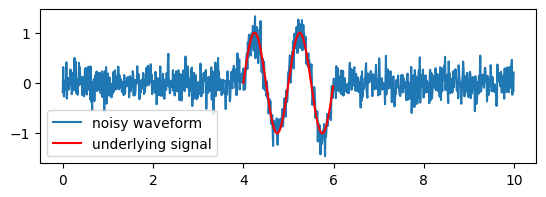

In [12]:
s = 0.2
sigma_known = sigma_unknown = 0
N = 100
fs = 100
tau = 4
T = 2

for _ in range(N):
    t, x, n = a3a.noisysignal(t0=0, tn=10, g=a1b.sinewave, fs=fs, tau=tau, T=T, s=s)

    Ps_known = a3a.power((x+n)[fs*tau:fs*(tau+T)])
    Ps_known = a3a.power(np.concatenate((n[:fs*tau], n[fs*(tau+T):])))
    SNR_known = a3a.snr(Ps_known, Ps_known)

    Ps_unknown = a3a.power(x+n)
    Pn_unknown = a3a.power(n)
    SNR_unknown = a3a.snr(Ps_unknown, Pn_unknown)

    sigma_known += a3a.snr2sigma(x, snr=SNR_known)
    sigma_unknown += a3a.snr2sigma(x, snr=SNR_unknown)

print(f"target sigma: {s}")
print(f"known signal location sigma: {round(sigma_known/N, 4)}")
print(f"unknown signal location sigma: {round(sigma_unknown/N, 4)}")
plt.figure().set_figheight(2)
plt.plot(t, x+n, label="noisy waveform")
plt.plot(t[400:600], x[400:600], 'r', label="underlying signal")
plt.legend()
plt.show()

### 3d. Estimating SNR

signal start index: 1000/7000
signal end index: 6000/7000
snr: 15.499dB

estimated start index: -1/7000
estimated end index: -1/7000
estimated snr: nandB


c:\Users\hitts\Dropbox\PC\Documents\GitHub\csds464\464-A3a_fxh157_files\A3a_fxh157.py:113: RuntimeWarning: invalid value encountered in scalar divide
  return energy(x)/len(x)


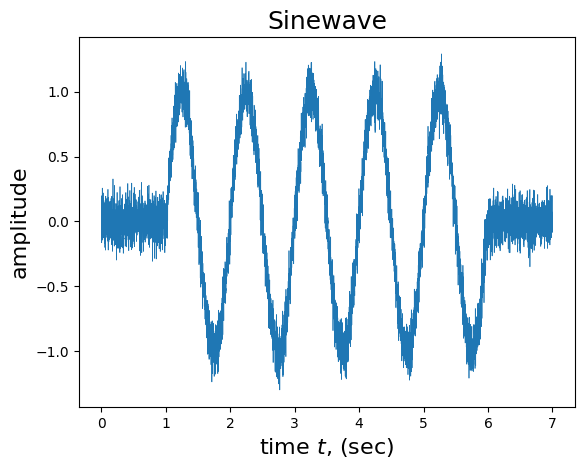

In [49]:
fs = 1000
tau = 1
T = 5
t, y, n = a3a.noisysignal(t0=0, tn=7, g=a1b.sinewave, fs=fs, tau=tau, T=T, s=0.1)
signal = y+n

Ps = a3a.power(y)
Pn = a3a.power(n)
print(f"signal start index: {fs*tau}/{len(signal)}")
print(f"signal end index: {fs*(tau+T)}/{len(signal)}")
print(f"snr: {round(10*math.log10(a3a.snr(Ps, Pn)), 3)}dB\n")

th = max(signal)*(4*s)
start, stop = a3a.extent(y=signal, th=th)
Ps = a3a.power(signal[start:stop])
Pn = a3a.power(np.concatenate((signal[:start], signal[stop:])))
print(f"estimated start index: {start}/{len(signal)}")
print(f"estimated end index: {stop}/{len(signal)}")
print(f"estimated snr: {round(10*math.log10(a3a.snr(Ps, Pn)), 3)}dB")

a3a.plot_noisysignal(t, signal, title="Sinewave")

Example: Plot 100 ms waveform sampled at 8000 Hz with a 100 Hz sine wave lasting for 100 ms with additive Gaussian noise at 10 dB SNR.

sigma: 0.22360679774997896


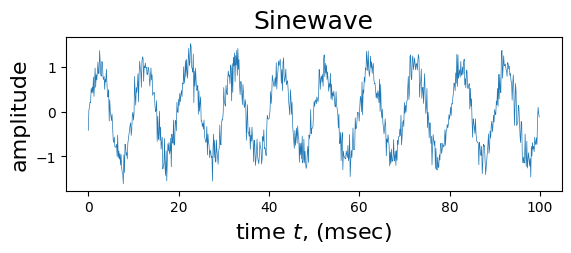

In [43]:
t, x, _ = a3a.noisysignal(t0=0, tn=100, g=a1b.sinewave, fs=8, tau=0, T=100, s=0, tscale=1, f=0.1)
s = a3a.snr2sigma(x, snr=10)
print(f"sigma: {s}")
t, y, n = a3a.noisysignal(t0=0, tn=100, g=a1b.sinewave, fs=8, tau=0, T=100, s=s, tscale=1, f=0.1)
plt.figure().set_figheight(2)
a3a.plot_noisysignal(t=t, y=y+n, title="Sinewave", tunits="msec")

Example: Plot a 2 ms step function with a delay of 50 ms in a waveform of 100 ms with 10 dB SNR calculated with knowledge of the signal location.

sigma: 0.31622776601683794


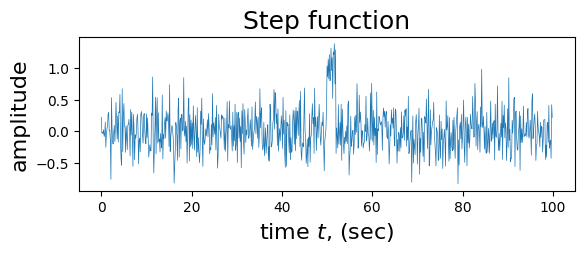

In [48]:
fs = 8
tau = 50
T = 2
t, x, _ = a3a.noisysignal(t0=0, tn=100, g=a3a.u, fs=fs, tau=tau, T=T, s=0, tscale=1)
s = a3a.snr2sigma(x[fs*tau:fs*(tau+T)], snr=10)
print(f"sigma: {s}")
t, x, n = a3a.noisysignal(t0=0, tn=100, g=a3a.u, fs=fs, tau=tau, T=T, s=s, tscale=1)
plt.figure().set_figheight(2)
a3a.plot_noisysignal(t=t, y=x+n, title="Step function", tunits="sec")

## 4. Grand synthesis

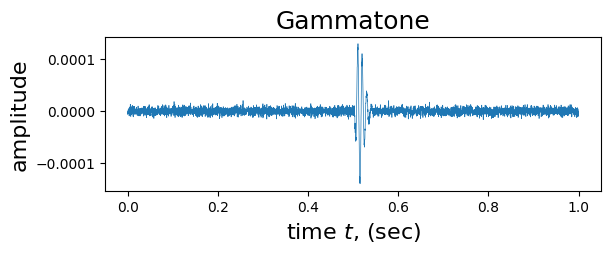

In [66]:
t, x, n = a3a.noisysignal(t0=0, tn=1, g=a1b.gammatone, fs=5000, tau=0.5, T=0.3, s=0.000005, f=100)
plt.figure().set_figheight(2)
a3a.plot_noisysignal(t, x+n, title="Gammatone")
scipy.io.wavfile.write("sound.wav", rate=10000, data=signal.astype(np.float32)*10000)
IPython.display.Audio("sound.wav")